In [316]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [317]:
z_h = 100
z_0hi = 0.92
u_star = 0.29
k = 0.4
z_0lo = 0.0001
beta = 0.68
D = 100
delta_ibl_0 = z_h

In [318]:
def square_park(park_length, park_width, x_start, y_start, plot):
    x_park = np.linspace(0, park_length, park_length)

    delta_ibl_x = delta_ibl_0 + z_0hi * (x_park/z_0hi)**(4/5)
    U_hT_x = (u_star / k) * (np.log(delta_ibl_x / z_0lo) / np.log(delta_ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)

    # Create a 2D array
    park_array = np.zeros((park_width, park_length))

    for y in range(len(U_hT_x)):
        park_array[0:park_width, y] = U_hT_x[y]

    if plot == True:
        # Set labels and title
        plt.imshow(park_array, aspect='auto', origin='lower')
        plt.gca().set_aspect('auto', adjustable='box')
        plt.colorbar(label='U_hT [m/s]')
        plt.xlabel('Downstream distance [m]')
        plt.ylabel('Hub Height Velocity [m/s]')
        plt.xlim(0, park_length)
        plt.ylim(0, park_width)
        plt.title('park_array Plot')
        plt.show()

    return park_array, park_length, park_width, x_start, y_start

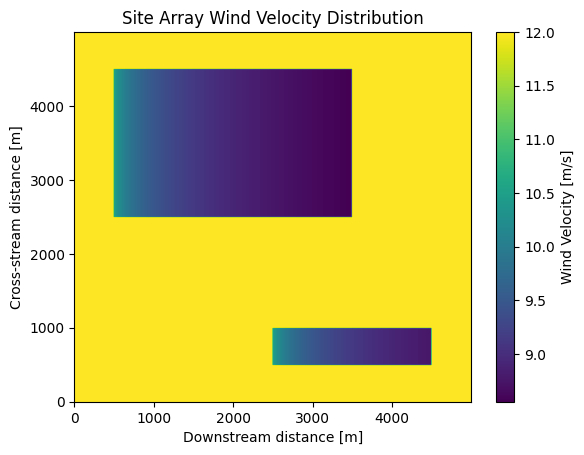

In [319]:
site_length = 5000
site_width = 5000
atmos_wind_vel = 12
park_amount = 2

site_array = np.full((site_width, site_length), float(atmos_wind_vel))

parks = []
# Parl call: park_length, park_width, x_start, y_start, plot
park_1 = square_park(3000, 2000, 500, 2500, False)
park_2 = square_park(2000, 500, 2500, 500, False)

park_string = "park_"

for i in range(1, park_amount + 1):

    park_string = park_string + str(i)

    # append here
    parks.append(eval(park_string))
    
    park_string = "park_"

for y in range(site_width):
    for x in range(site_length):

        for park in parks:

            if y >= park[4] and y < park[4] + park[2] and x >= park[3] and x < park[3] + park[1]:
                site_array[y, x] = park[0][y - park[4], x - park[3]]
        
        if site_array[y, x] == 0:
            site_array[y, x] = atmos_wind_vel

plt.imshow(site_array, aspect='auto', origin='lower')
plt.colorbar(label='Wind Velocity [m/s]')
plt.xlabel('Downstream distance [m]')
plt.ylabel('Cross-stream distance [m]')
plt.title('Site Array Wind Velocity Distribution')
plt.show()